# Who would survive - Titanic dataset from Kaggle.com

In this tutorial, I'm going to use a very simple dataset (the Titanic dataset from Kaggle.com) to show you how to start and finish a simple data science project using Python and Yellowbrick, from exploratory data analysis, to feature selection and feature engineering, to model building and evaluation.

*The original author of the notebook is [Juan L. Kehoe](https://juan0001.github.io/How-to-start-your-first-data-science-project-a-practical-tutorial-for-beginners/).*

## Brief peek into the dataset

In [1]:
import pandas as pd

df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


As we can see above, the dimension of the table is (891, 12) which means there are 891 rows and 12 columns in the table. Each row in the table represents a passenger or a member of the crew, each column represents the information for that person which is also known as variable.

## Exploratory data analysis (EDA)

The questions I want to ask are:

1. What are the variables look like? For example, are they numerical or categorical data. If they are numerical, what are their distribution; if they are categorical, how many are they in different categories.

2. Are the numerical variables correlated?
3. Are the distributions of numerical variables the same or different among survived and not survived? Is the survival rate different for different values? For example, if there are more people survived if they are younger.
4. Are there different survival rates in different categories?
For example, if there are more women survived than man.

### 1. What are the variables look like?

To answer this question, first I'm going to check the summary of the variables, then make some histograms for the numerical variables, and some barplots for the categorical variables.

#### Summary of the variables

In [12]:
# summary of all the numerical variable
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# summary of all the objective variables (including categorical and text)
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Johannesen-Bratthammer, Mr. Bernt",male,1601,G6,S
freq,1,577,7,4,644


#### Histograms of the numerical variables

Histograms are very good visulization technique to check the distribution of numerical data.

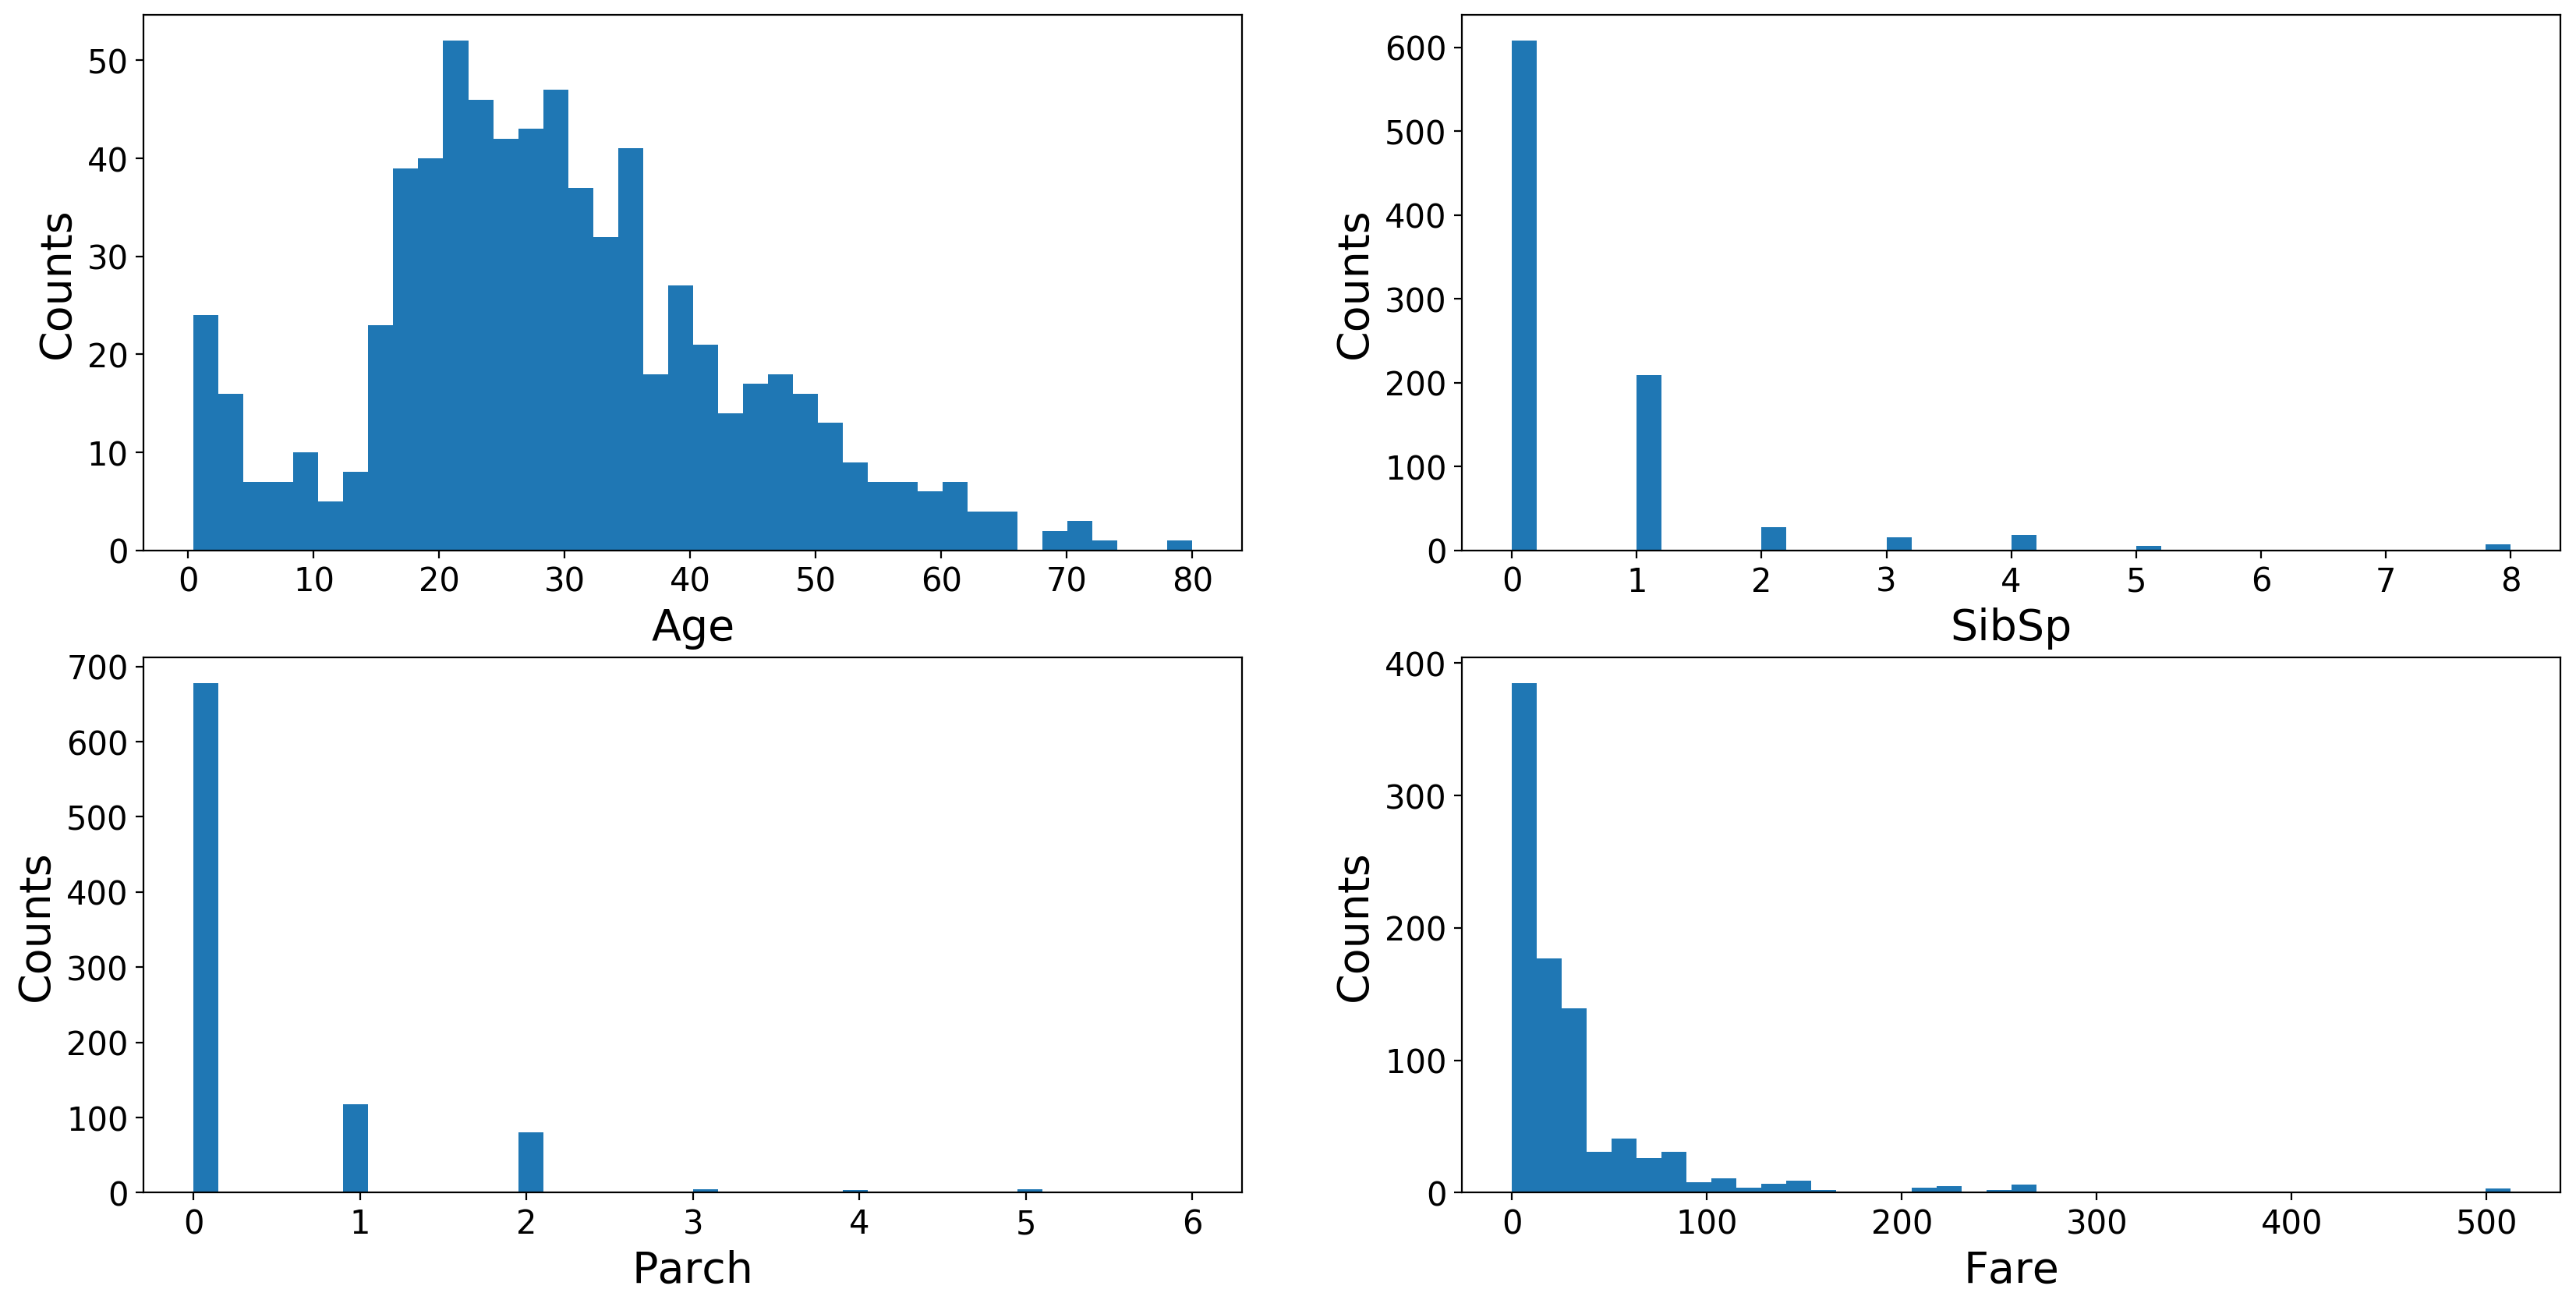

In [2]:
# import visulization packages
import matplotlib.pyplot as plt

# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['figure.dpi'] = 200

# make subplots
fig, axes = plt.subplots(nrows=2, ncols=2)

# Specify the features of interest
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'CNTS']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

From the histogram, we see that all the values in the variables seems in the correct range. Most of the people don't have siblings or relatives with them. And a large amount of the tickets are less than $50. There are very small amount of tickets are over $500.

#### Barplot for the categorical data

Since "Ticket" and "Cabin" have too many levels (more than 100), I will not make the barplot for these variables.

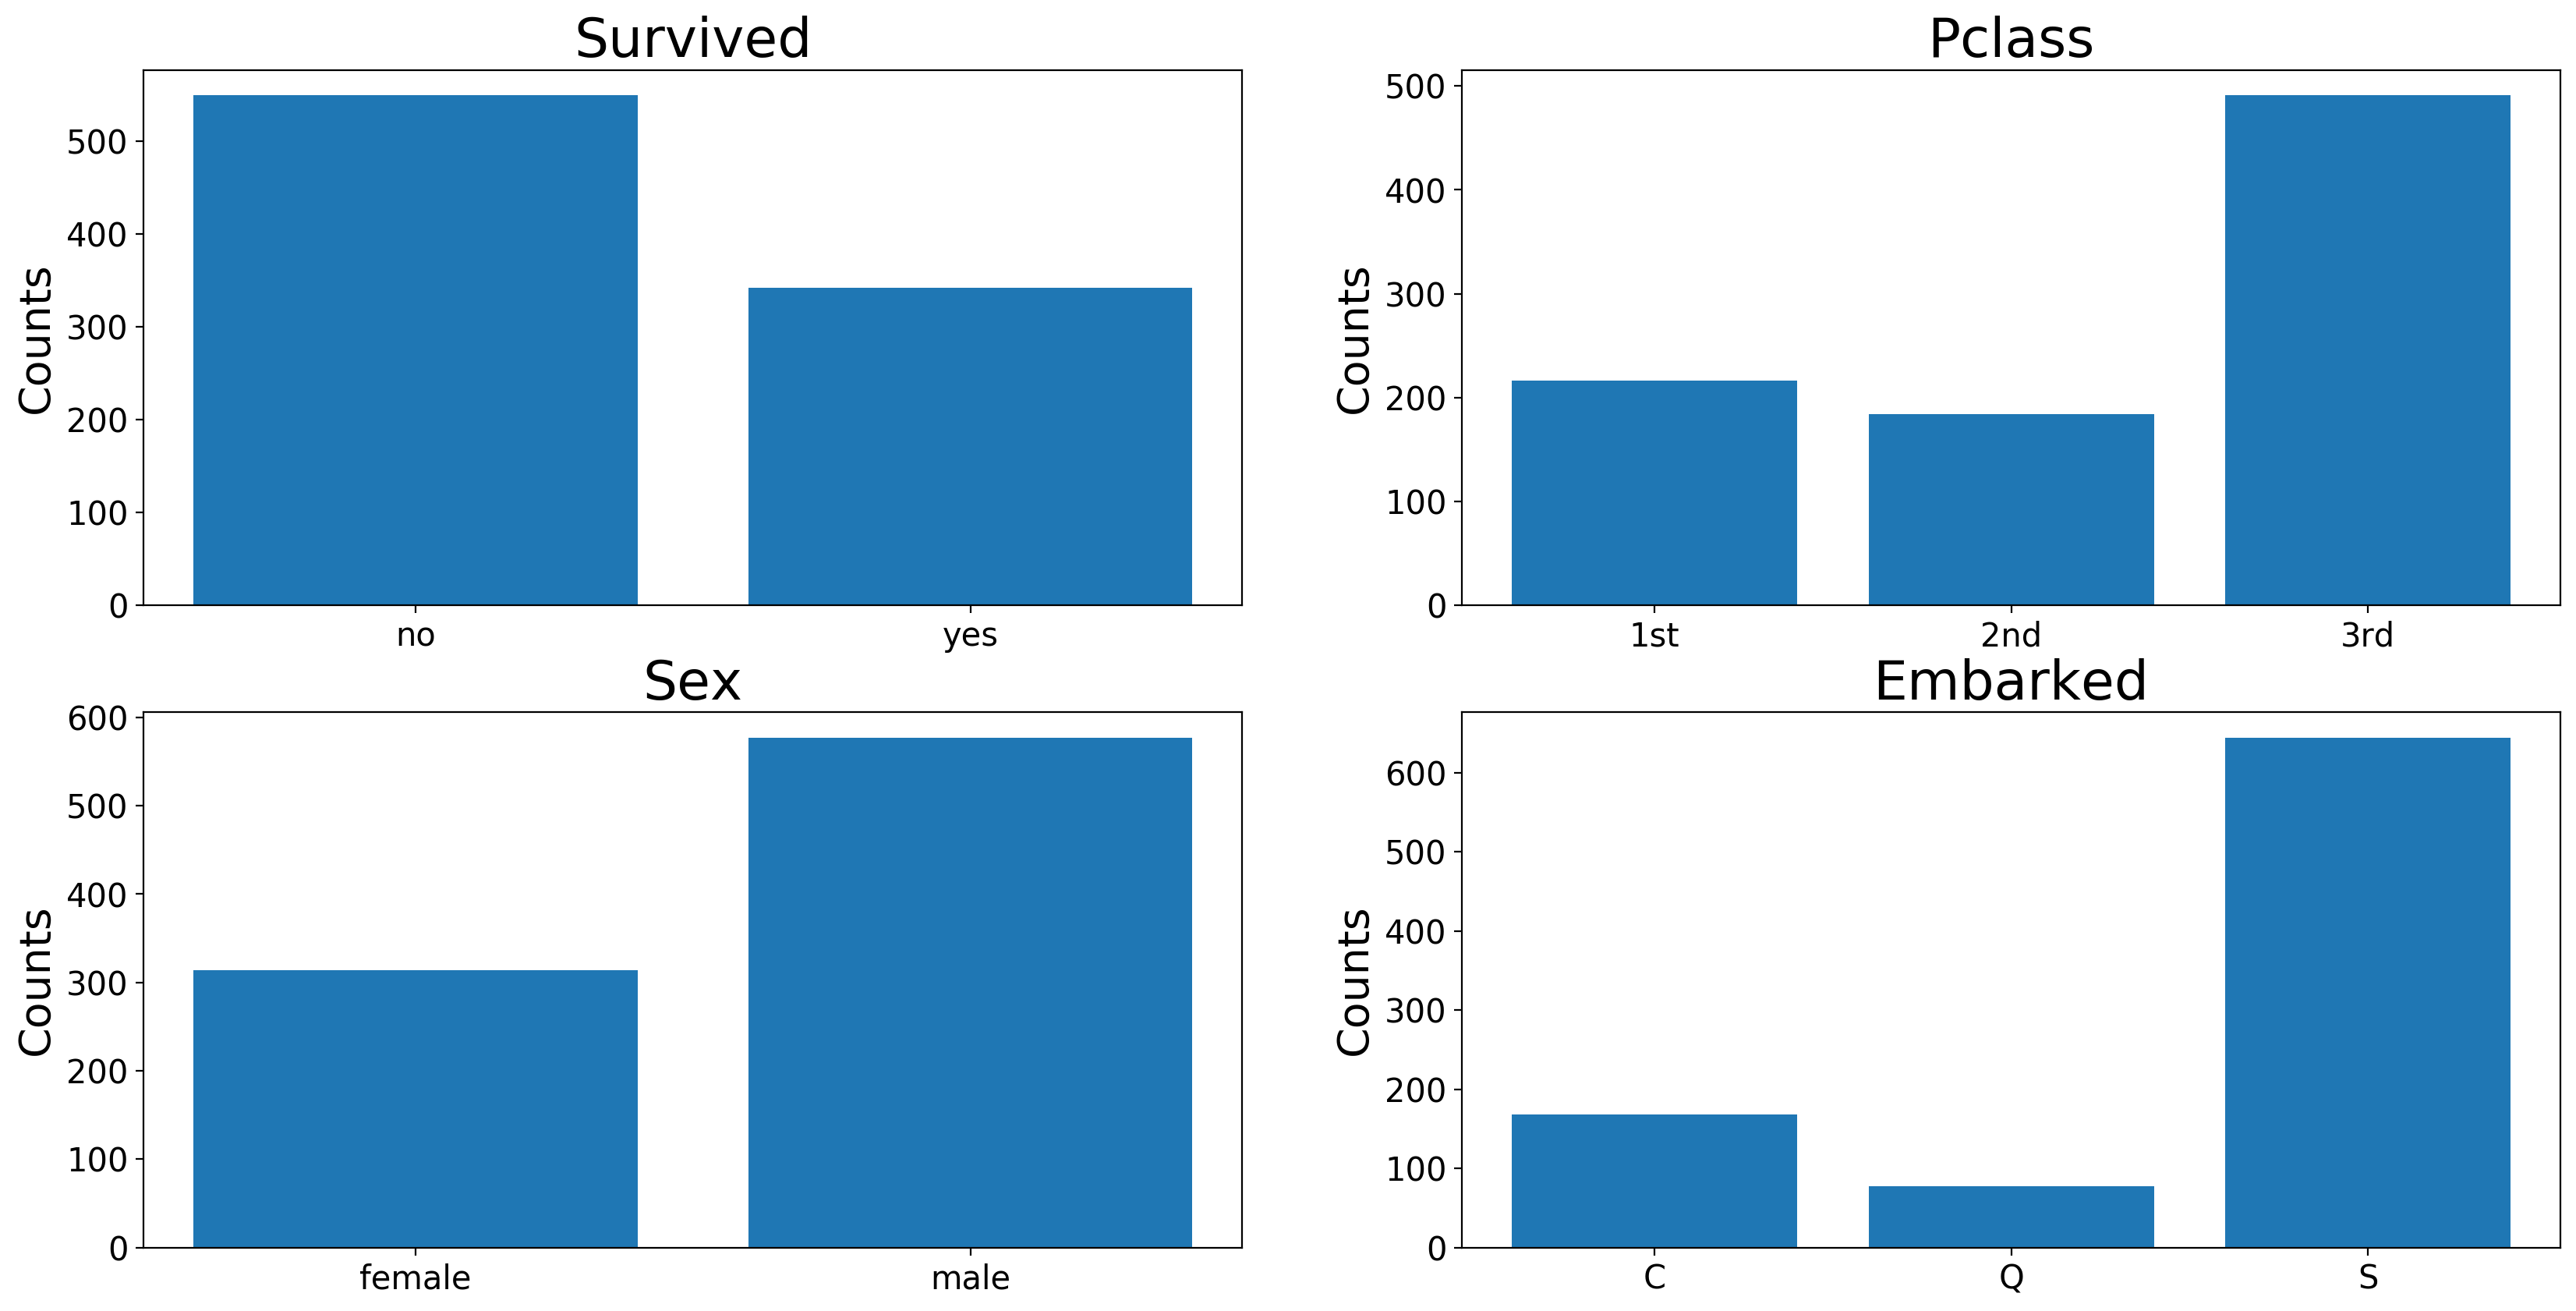

In [15]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['figure.dpi'] = 200

# make subplots
fig, axes = plt.subplots(nrows=2, ncols=2)

# make the data read to feed into the visulizer
X_Survived = df.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')[
    'Survived']
Y_Survived = df.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')[
    'Counts']
# make the bar plot
axes[0, 0].bar(X_Survived, Y_Survived)
axes[0, 0].set_title('Survived', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Pclass = df.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')[
    'Pclass']
Y_Pclass = df.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')[
    'Counts']
# make the bar plot
axes[0, 1].bar(X_Pclass, Y_Pclass)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Sex = df.groupby('Sex').size().reset_index(name='Counts')['Sex']
Y_Sex = df.groupby('Sex').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_Sex, Y_Sex)
axes[1, 0].set_title('Sex', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Embarked = df.groupby('Embarked').size().reset_index(name='Counts')['Embarked']
Y_Embarked = df.groupby('Embarked').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_Embarked, Y_Embarked)
axes[1, 1].set_title('Embarked', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)

### 2. Are the numerical variables correlated?



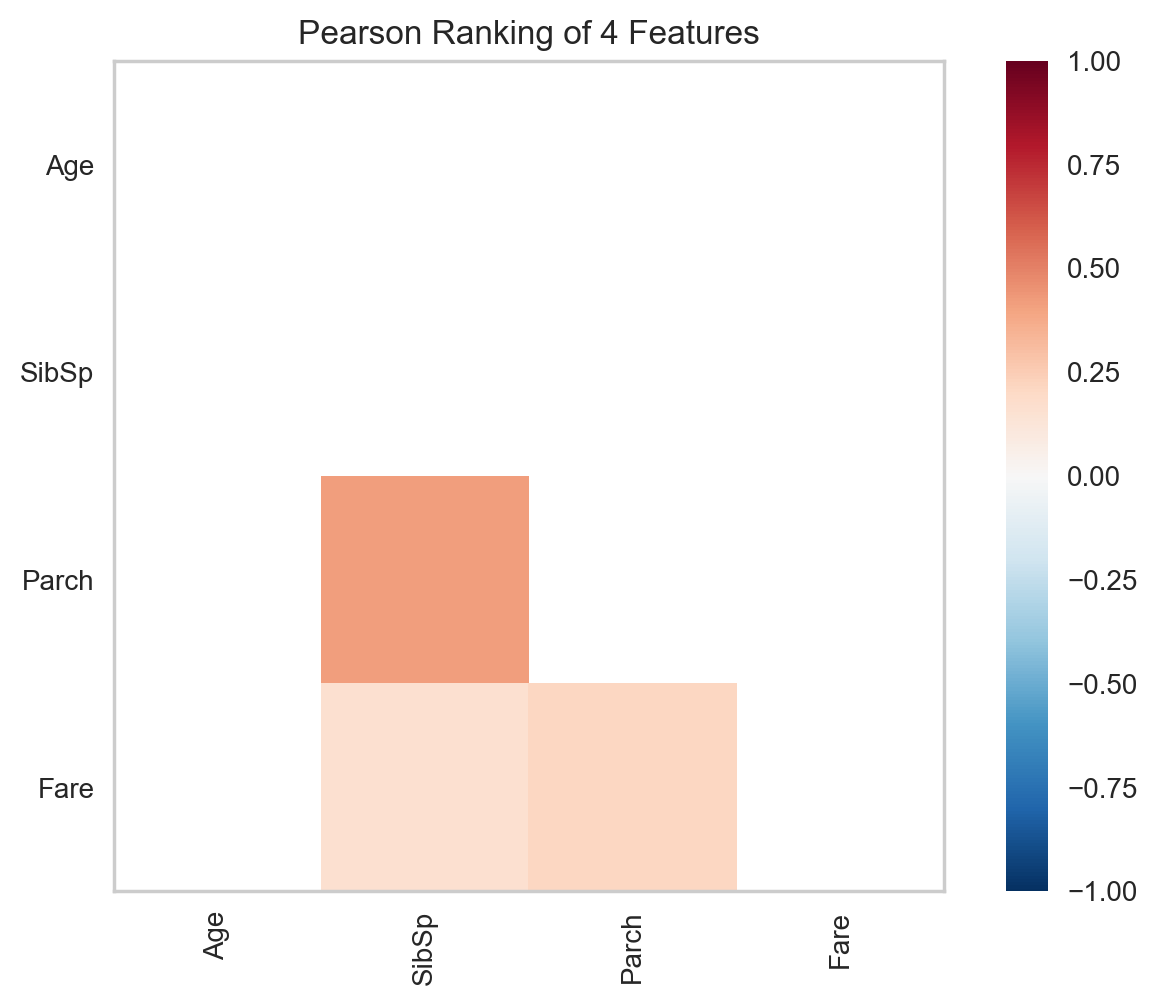

In [16]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 2)
plt.rcParams['figure.dpi'] = 200

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = df[num_features].to_numpy()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)  # Fit the data to the visualizer
visualizer.transform(X)  # Transform the data
visualizer.poof()  # Draw/show/poof the data

From the pearson ranking figure above, we can see that the correlation between variables are low (<0.5).

### 3. Are the distribution of numerical variables the same or different among survived and not survived?

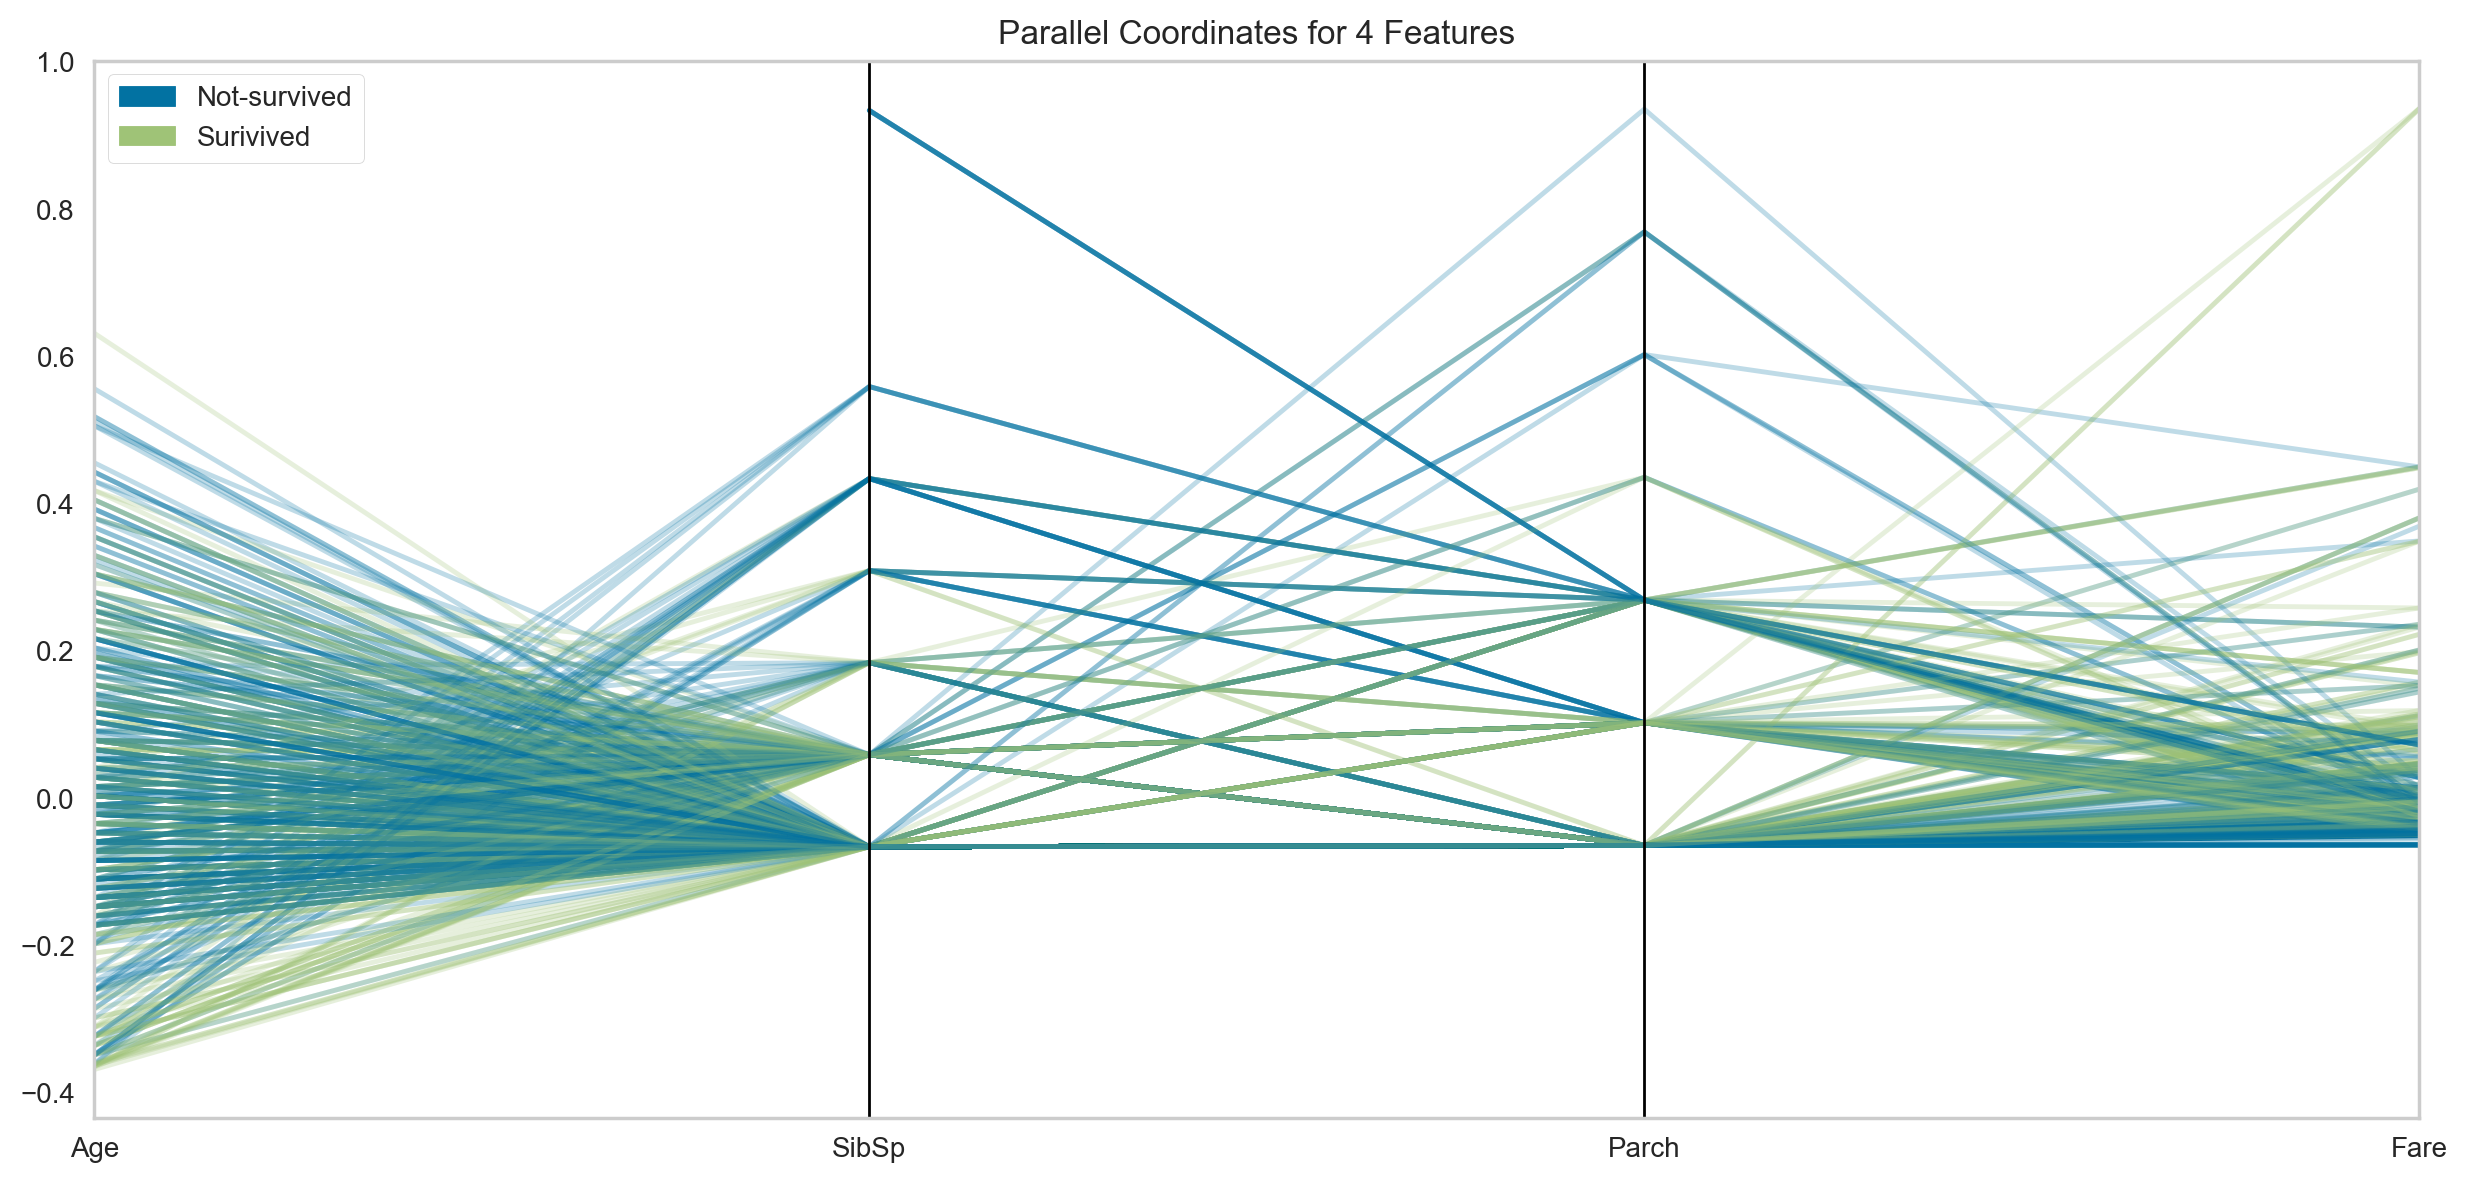

In [17]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50
plt.rcParams['figure.dpi'] = 200

# setup the color for yellowbrick visulizer
# from yellowbrick.style import set_palette
# set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates

# Specify the features of interest and the classes of the target
classes = ['Not-survived', 'Surivived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

# copy data to a new dataframe
data_norm = df.copy()
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (df[feature] - df[feature].mean(skipna=True)) / (
            df[feature].max(skipna=True) - df[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].to_numpy()
y = df.Survived.to_numpy()

# Instantiate the visualizer
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)

# axes = plt.axes()
# axes.set(facecolor = "black")
# axes.tick_params(axis='x', colors='gray')

visualizer.fit(X, y)  # Fit the data to the visualizer
visualizer.transform(X)  # Transform the data
visualizer.poof()  # Draw/show/poof the data

We can see from the figure that lots of passengers with more siblings on the boat have a higher death rate. Passengers paid a higher fare survived more.

### 4. Are there different survival rates in different categories?

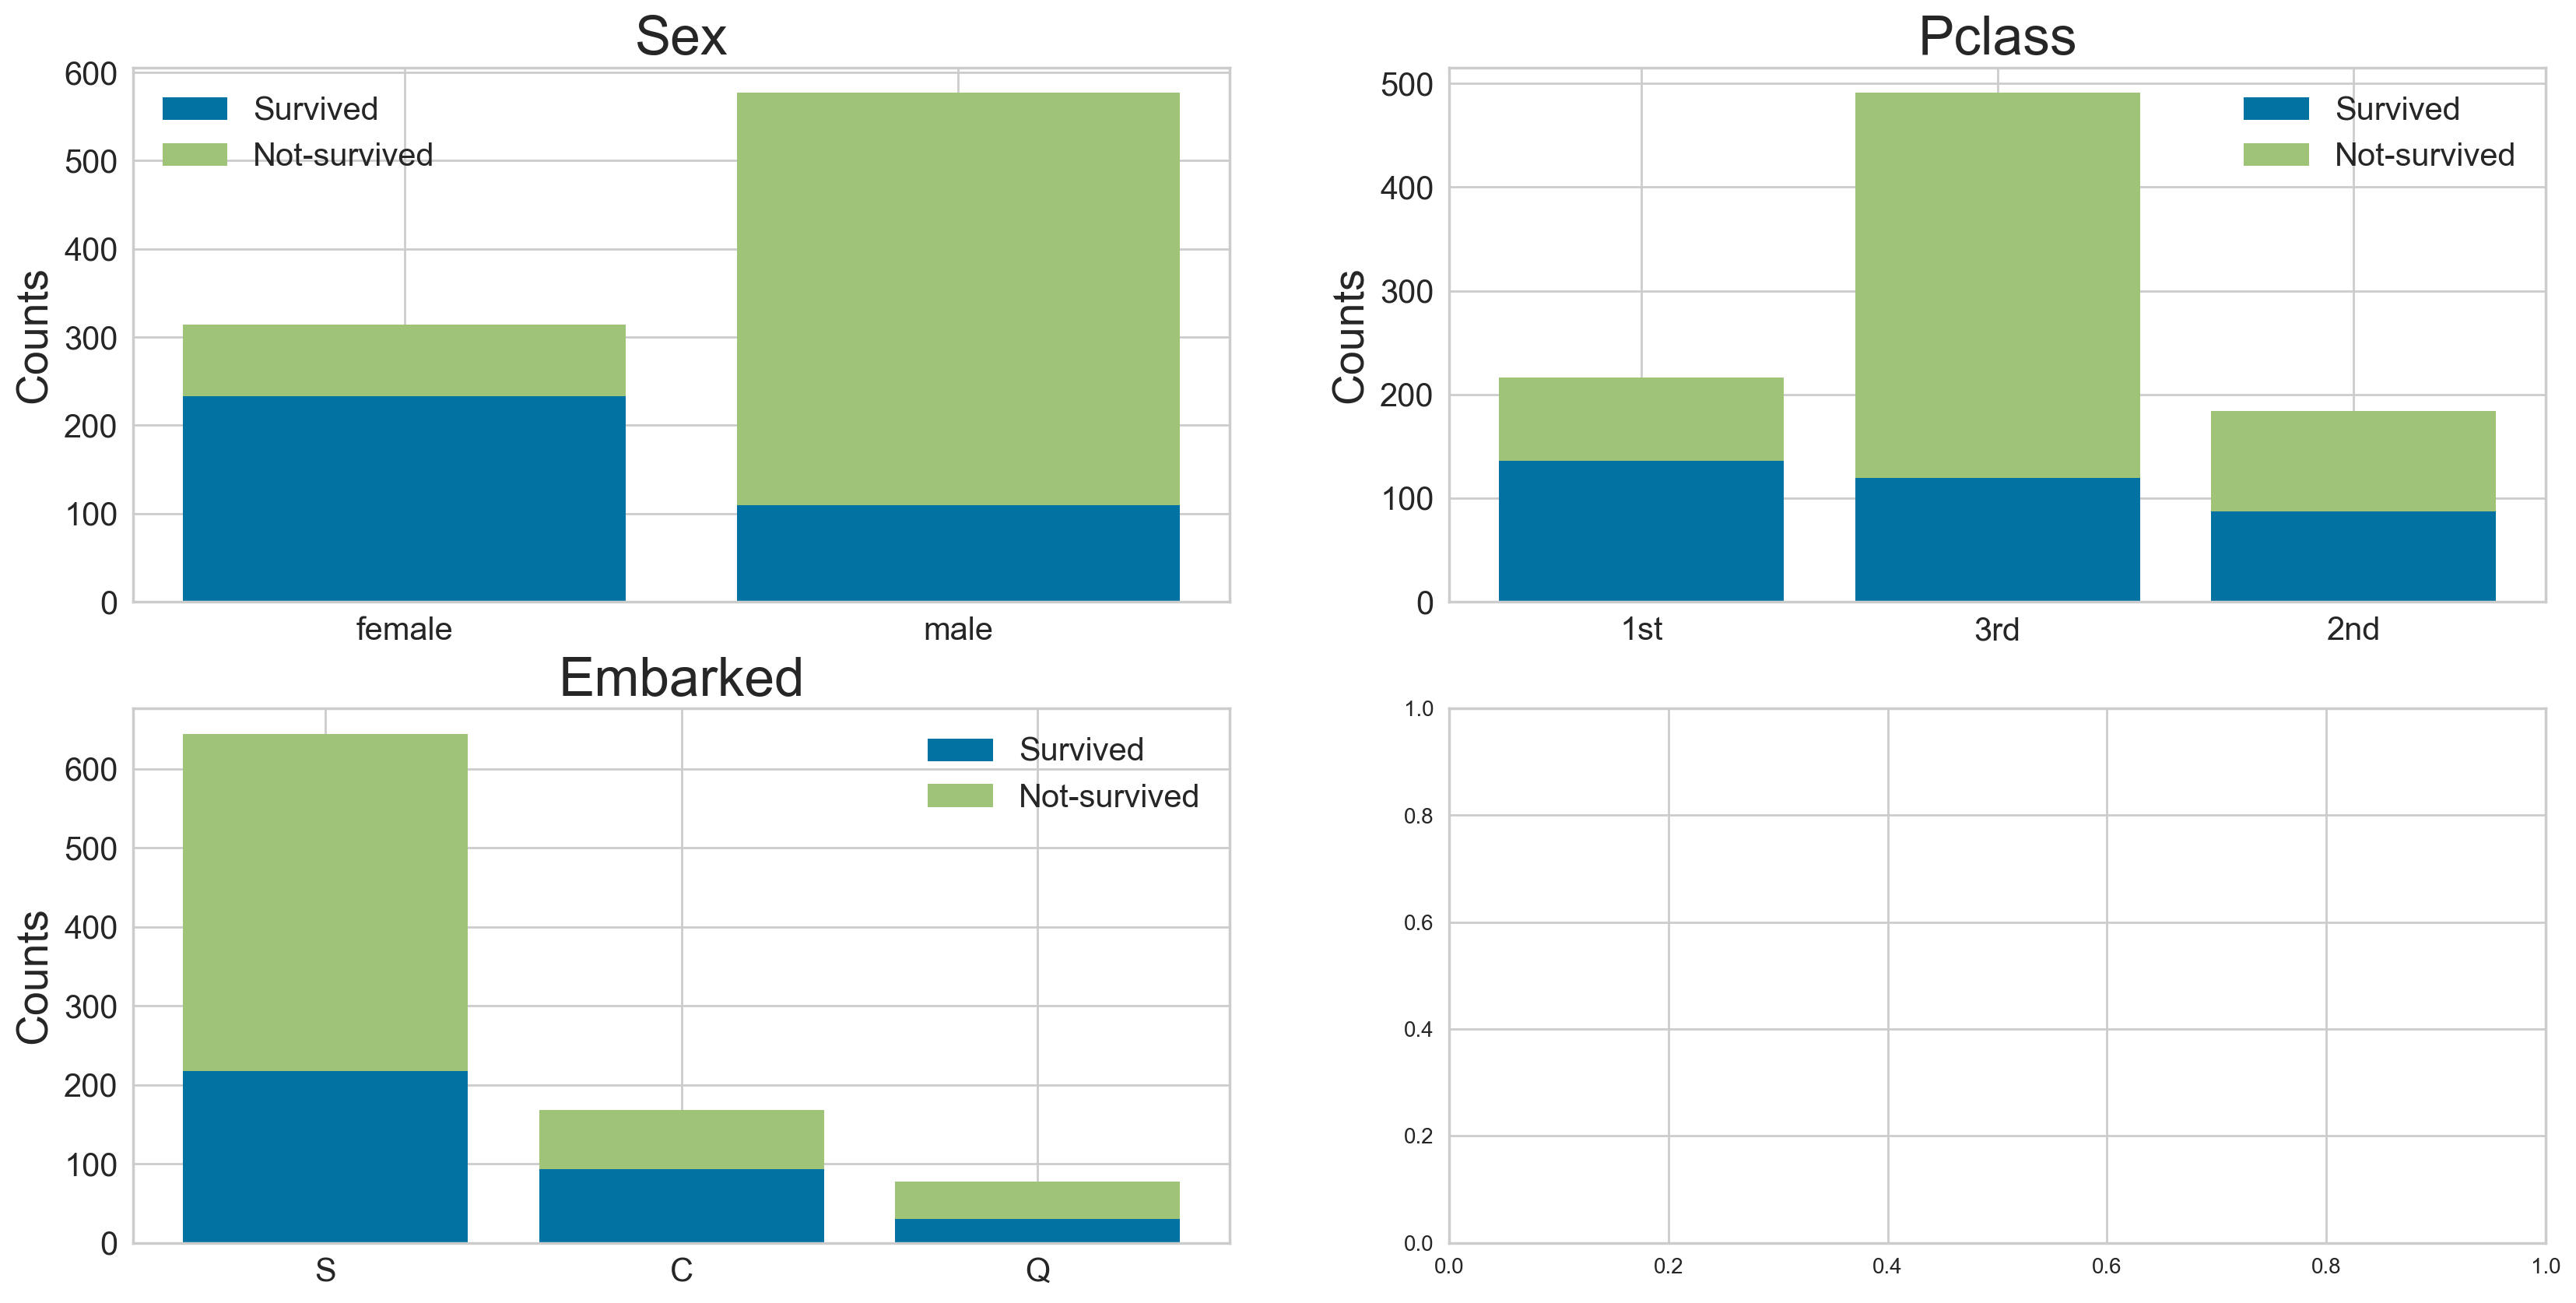

In [18]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['figure.dpi'] = 200

# make subplots
fig, axes = plt.subplots(nrows=2, ncols=2)

# make the data read to feed into the visulizer
Sex_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[df['Survived'] == 1][
    'Sex'].value_counts()
Sex_not_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[df['Survived'] == 0][
    'Sex'].value_counts()
Sex_not_survived = Sex_not_survived.reindex(index=Sex_survived.index)
# make the bar plot
p1 = axes[0, 0].bar(Sex_survived.index, Sex_survived.values)
p2 = axes[0, 0].bar(Sex_not_survived.index, Sex_not_survived.values, bottom=Sex_survived.values)
axes[0, 0].set_title('Sex', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Survived', 'Not-survived'), fontsize=15)

# make the data read to feed into the visulizer
Pclass_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[
    df['Survived'] == 1]['Pclass'].value_counts()
Pclass_not_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[
    df['Survived'] == 0]['Pclass'].value_counts()
Pclass_not_survived = Pclass_not_survived.reindex(index=Pclass_survived.index)
# make the bar plot
p3 = axes[0, 1].bar(Pclass_survived.index, Pclass_survived.values)
p4 = axes[0, 1].bar(Pclass_not_survived.index, Pclass_not_survived.values, bottom=Pclass_survived.values)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Survived', 'Not-survived'), fontsize=15)

# make the data read to feed into the visulizer
Embarked_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[df['Survived'] == 1][
    'Embarked'].value_counts()
Embarked_not_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[df['Survived'] == 0][
    'Embarked'].value_counts()
Embarked_not_survived = Embarked_not_survived.reindex(index=Embarked_survived.index)
# make the bar plot
p5 = axes[1, 0].bar(Embarked_survived.index, Embarked_survived.values)
p6 = axes[1, 0].bar(Embarked_not_survived.index, Embarked_not_survived.values, bottom=Embarked_survived.values)
axes[1, 0].set_title('Embarked', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Survived', 'Not-survived'), fontsize=15)

As we can see from upper figures, there are more female survived. And the death rate in the 3rd ticket class and the embarkation from Southampton port is much higher than the others.

## Feature selection and feature engineering

In this step, we will do lots of things to the features, such as drop some features, filling the missing value, log transformation, and One Hot Encoding for the categorical features.

#### Features we will not use in our model

We will delete the features `PassengerId`, `Name`, `Ticket` and `Cabin` from our model. The reasons are as follows:

* `PassengerId`: just a serires of numbers from 1 - 891 which is used to label each person.
* `Name`: the names of all the passengers, which might give some information like if there are some people are related based on the last names. But to simplify things up at this stage, I will pass this feature.
* `Ticket` and "Cabin": too many levels with unknown information.


#### Filling in missing valuess

From EDA, we know there are some missing value in `Age`, `Cabin` and `Embarked` variables. Since we are not going to use `Cabin` feature, we will just fill `Age` and `Embarked`. I will fill the missing value in `Age` using the median age and fill the missing value in `Embarked` with `S` since there are only 2 values missing and `S` is the most represent in the dataset.

In [19]:
# fill the missing age data with median value
def fill_na_median(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)


fill_na_median(df['Age'])

# check the result
df['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [20]:
# fill with the most represented value
def fill_na_most(data, inplace=True):
    return data.fillna('S', inplace=inplace)


fill_na_most(df['Embarked'])

# check the result
df['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

#### Log-transformation of the "Fare"

From the histograms, we can see that the distribution of `Fare` is highly right-skewed. For dealing with highly-skewed positive data, one of the strategies that can be used is log-transformation, so the skewness will be less. Since the minimum is `0`, we will add `1` to the raw value, so there will not be any errors when using log-transformation

In [21]:
# import package
import numpy as np


# log-transformation
def log_transformation(data):
    return data.apply(np.log1p)


df['Fare_log1p'] = log_transformation(df['Fare'])

# check the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_log1p
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,2.962246
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.969048
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,2.187218
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,2.737881
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,3.465736
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,6.240917


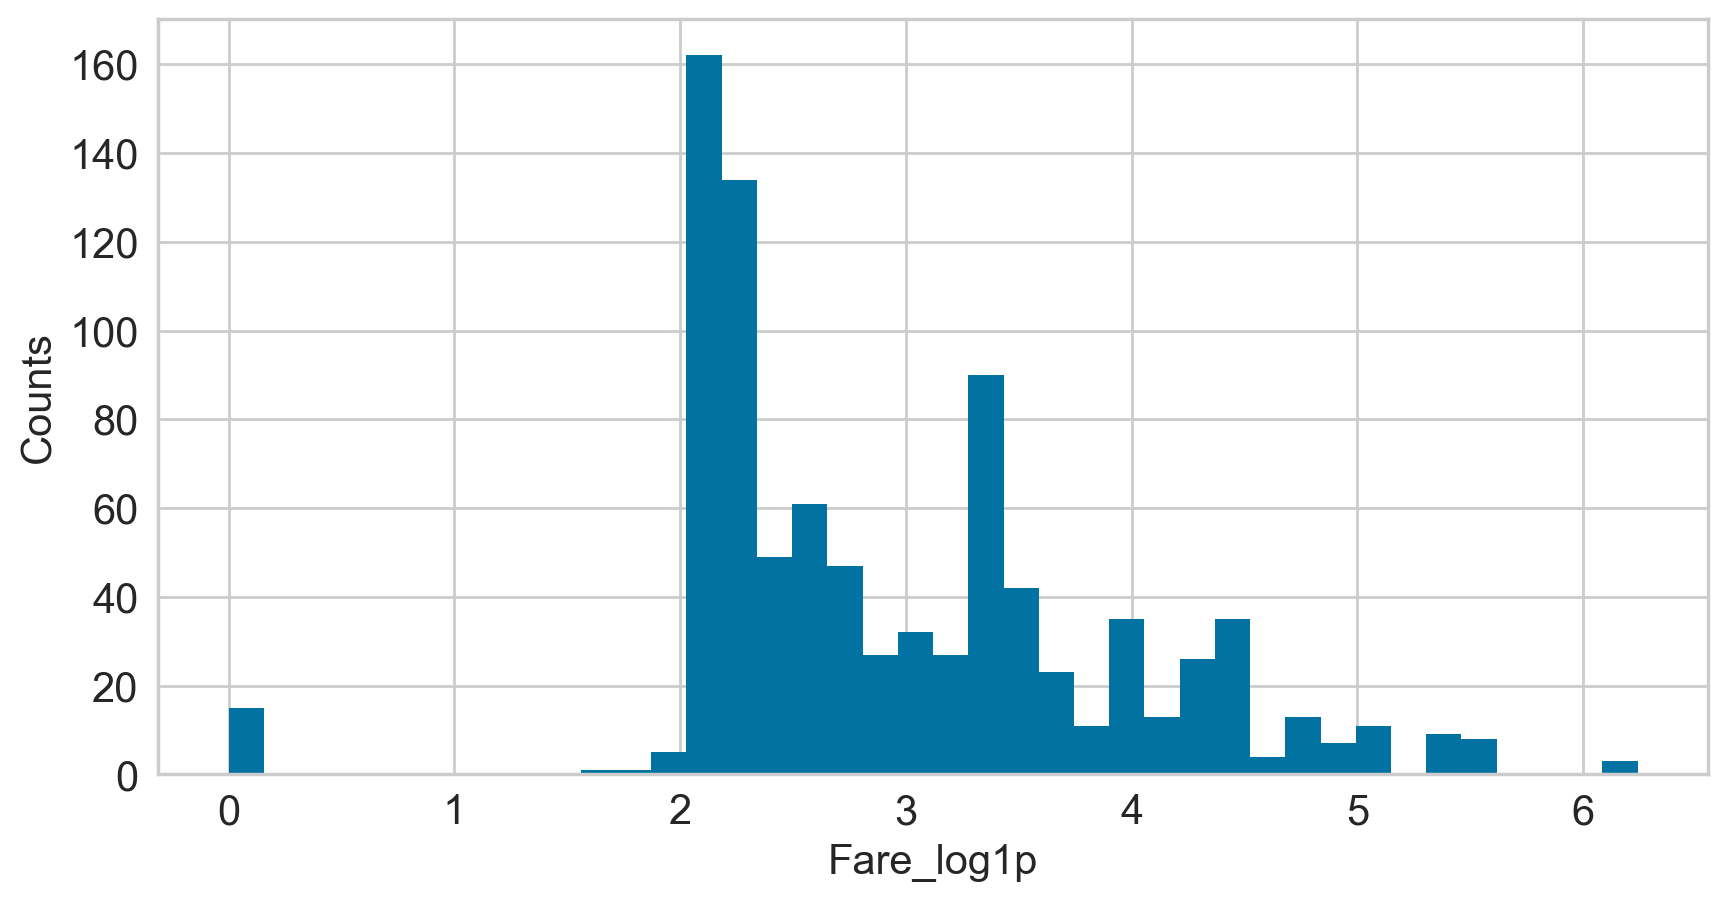

In [22]:
# check the distribution using histogram
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 200

plt.hist(df['Fare_log1p'], bins=40)
plt.xlabel('Fare_log1p', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.tick_params(axis='both', labelsize=15)

We can see from the figure above, after log-transformation the data is much less skewed.

### One Hot Encoding for the categorical features

In [23]:
# get the categorical data
cat_features = ['Pclass', 'Sex', "Embarked"]
data_cat = df[cat_features]
data_cat = data_cat.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})
# One Hot Encoding
data_cat_dummies = pd.get_dummies(data_cat)
# check the data
data_cat_dummies.head()

,Pclass_1st,Pclass_2nd,Pclass_3rd,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1


### Model training and model evaluation

Here I will put model training and model evaluation in one part since yellowbrick is a very good package that can wrap the model and creates good visulization of the model performance which makes the model evaluation much easier and fun.

#### Prepares data for the model training and evaluation

Before we train the model, we will need to split the data into 2 sets: training and validation. We will use the training dataset to train the model and use the validation dataset to evaluate the model.

In [ ]:
# create a whole features dataset that can be used for train and validation data splitting
# here we will combine the numerical features and the dummie features together
features_model = ['Age', 'SibSp', 'Parch', 'Fare_log1p']
data_model_X = pd.concat([df[features_model], data_cat_dummies], axis=1)

In [24]:
# create a whole target dataset that can be used for train and validation data splitting
data_model_y = df.replace({'Survived': {1: 'Survived', 0: 'Not_survived'}})['Survived']

In [25]:
# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size=0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Survived and not-survived
print('\n')
print('No. of survived and not-survived in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of survived and not-survived in the validation set:')
print(y_val.value_counts())

No. of samples in training set:  623
No. of samples in validation set: 268


No. of survived and not-survived in the training set:
Not_survived    373
Survived        250
Name: Survived, dtype: int64


No. of survived and not-survived in the validation set:
Not_survived    176
Survived         92
Name: Survived, dtype: int64


#### Model training and evaluation visulization using yellowbrick

For the purpose of this project is to predict if one passenger was survived or not, it's a classification problem. There are lots of algorithms that can be used to do classification modeling. Here I will use logistic regression.

There are lots of evaluation metrics you can use to evaluate your model for classification problem. Here I will use Confusion Matrix, precision, recall, F1 score, and ROC curve.

##### Confusion Matrix

/Users/jetbrains/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


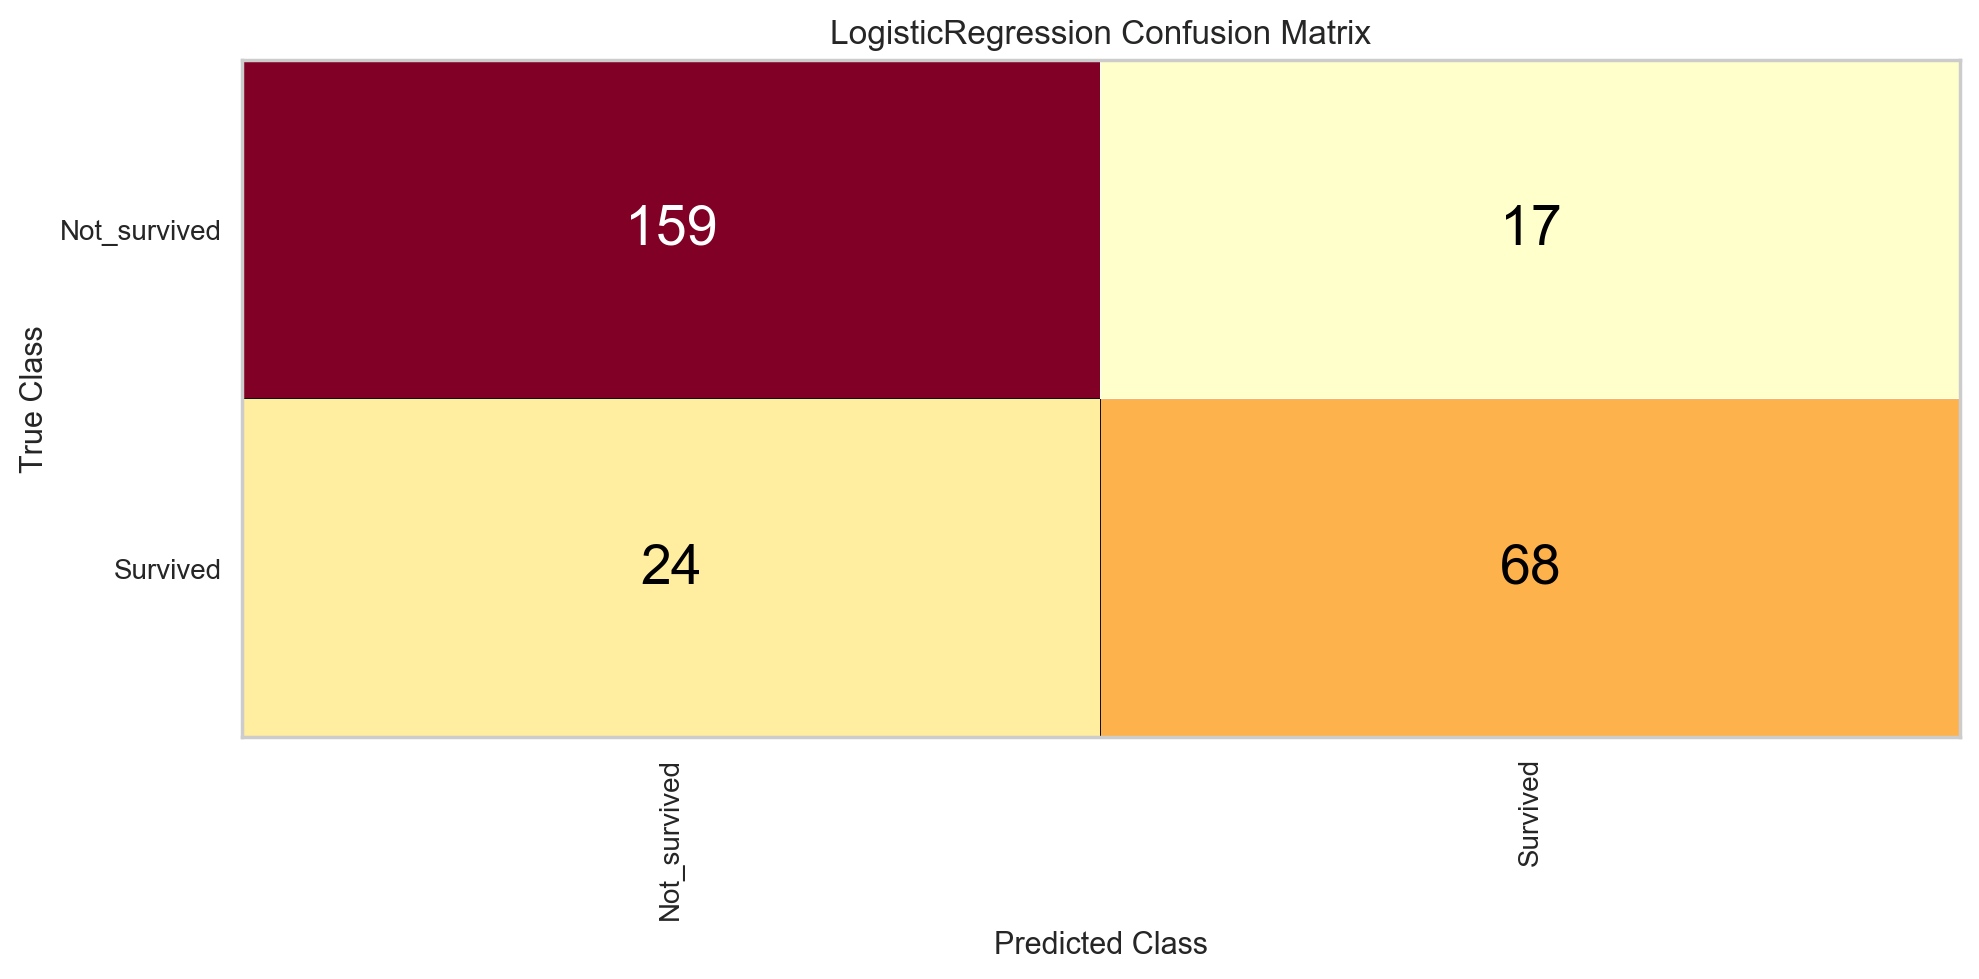

In [26]:
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model
model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
classes = ['Not_survived', 'Survived']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

As we can see from the confusion matrix, the accuracy of the model is (158+68) / (158+24+18+68) = 84.33%. It's much higher than random guess, which is 50.00%. If you use majority guess, the accuracy will be a little higher which is 176/268 = 65.67%, but still lower than our model. It seems like our model worked pretty well which means we should use a machine learning model to predict who survived in this instance.

##### Precision, recall and F1 score

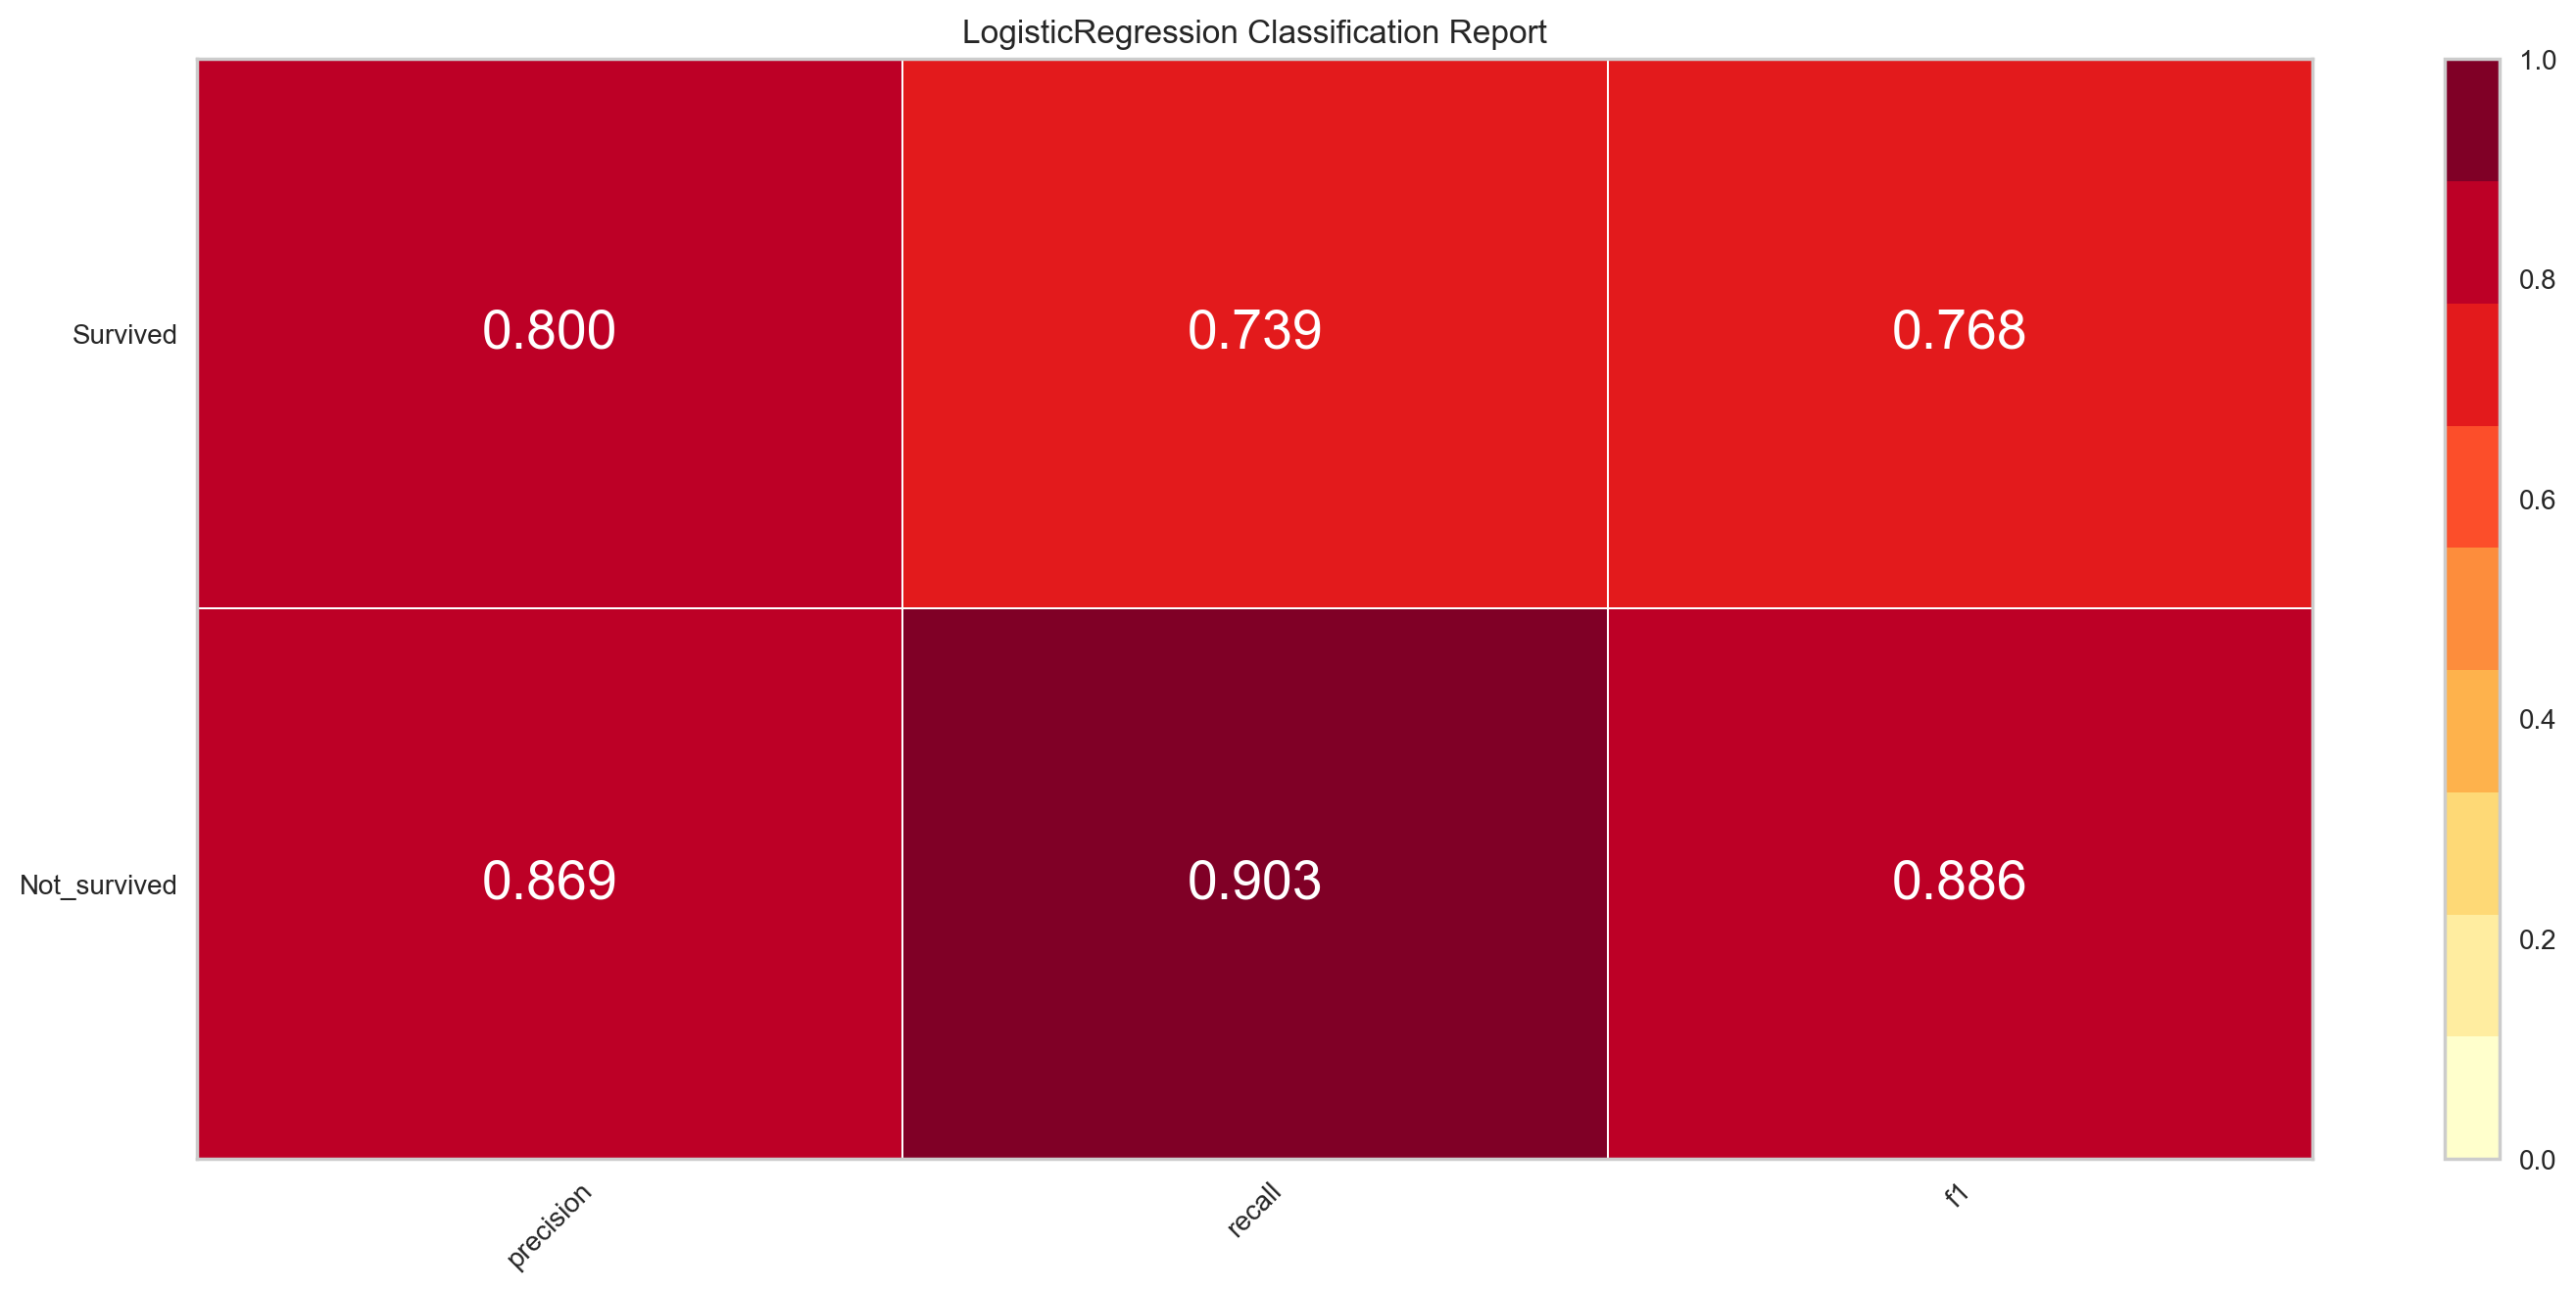

In [27]:
# set the size of the figure and the font size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()  # Draw/show/poof the data

The precision, recall, and F1 score result further confirmed that the model is relatively good.